# Wrangling and Pre-Analysis

This notebook only deals with the pre-analysis of the sample files. We are trying to understand how we can develop cleaning strategies for the data in this notebook

**This is not the EDA of the summary files. EDA is present in another jupyter notebook.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
MAINPATH="C:/Users/visha/Desktop/MSIS/Advanced Data Science/Assignments/MIDTERM/FM Dataset/Samples/"
FILENAMEORIG="sample_orig_2007.txt"
FILENAMESUMMARY="sample_svcg_2007.txt"

In [198]:
MAINPATH="C:/Users/visha/Desktop/MSIS/Advanced Data Science/Assignments/MIDTERM/FM Dataset/Historical Data/"
FILENAMEORIG="historical_data1_Q32007.txt"
FILENAMESUMMARY="historical_data1_time_Q32007.txt"

In [11]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 500)

# Origination Data Cleaning

In [3]:
origcollist=['CREDIT_SCORE','FIRST_PAY_DATE','FIRST_HOME_BUYER_FLAG','MATURITY_DATE','MSA','MI_PERCENT','N_UNITS','OCCUPANCY_STATS','OG_CLTV','OG_DTI','OG_UPB','OG_LTV','OG_INTRATE','CHANNEL','PPM_FLAG','PRODUCT_TYPE','PROP_STATE','PROP_TYPE','POSTALCODE','LOAN_SEQ_NO','LOAN_PURPOSE','OG_LOANTERM','NO_BORROWERS','SELLER_NAME','SERVICE_NAME','SUPER_CONFORMING_FLAG']
df_orig=pd.read_csv(MAINPATH+FILENAMEORIG,delimiter="|",names=origcollist)
df_orig.head()

,CREDIT_SCORE,FIRST_PAY_DATE,FIRST_HOME_BUYER_FLAG,MATURITY_DATE,MSA,MI_PERCENT,N_UNITS,OCCUPANCY_STATS,OG_CLTV,OG_DTI,...,PROP_STATE,PROP_TYPE,POSTALCODE,LOAN_SEQ_NO,LOAN_PURPOSE,OG_LOANTERM,NO_BORROWERS,SELLER_NAME,SERVICE_NAME,SUPER_CONFORMING_FLAG
0,606,200703,N,203702,NaN,0,1,O,62.0,46,...,AK,SF,99600,F107Q1000009,C,360,2.0,Other sellers,Other servicers,NaN
1,712,200703,N,203702,NaN,0,1,O,48.0,15,...,ME,SF,4500,F107Q1000019,C,360,2.0,Other sellers,Other servicers,NaN
2,698,200704,N,203703,24020.0,0,1,I,75.0,50,...,NY,SF,12800,F107Q1000028,C,360,2.0,Other sellers,Other servicers,NaN
3,757,200703,N,203702,NaN,0,1,O,83.0,48,...,KY,SF,42100,F107Q1000046,N,360,1.0,Other sellers,Other servicers,NaN
4,761,200703,N,203702,24660.0,0,1,O,43.0,32,...,NC,SF,27200,F107Q1000065,C,360,1.0,Other sellers,USBANKNA,NaN


In [125]:
rowcnt = len(df_orig.index)
# Example data
features = []
missngpercnt = []
#error = np.random.rand(len(features))
if rowcnt > 0:
    for x in df_orig:
        features.append(x)
        prcnt = float(len(df_orig[df_orig[x].isnull()])) / float(rowcnt) * 100.0
        missngpercnt.append(prcnt)
else:
    features = df.columns
    missngpercnt = [0] * len(features)


In [126]:
missingprcntdata = pd.DataFrame({'Features':features,'MissingPercentage':missngpercnt})
missingprcntdata = missingprcntdata.sort_values('MissingPercentage',ascending =False)
missingprcntdata

,Features,MissingPercentage
25,SUPCONFORMFLG,100.000
4,MSA,17.342
2,FIRSTTIMEHMBUYFLG,6.994
14,PPM,0.226
9,DTI,0.114
22,NUMBORR,0.046
8,CLTV,0.004
11,ORIGLTV,0.004
16,PROPSTATE,0.000
24,SERVICERNAME,0.000


In [128]:
df_orig.dtypes

CREDITSCORE           object
FIRSTPYMNTDATE         int64
FIRSTTIMEHMBUYFLG     object
MATURITYDATE           int64
MSA                  float64
MI                     int64
NUMUNITS               int64
OCCUSTAT              object
CLTV                 float64
DTI                   object
ORIGUPB                int64
ORIGLTV              float64
ORIGINTRATE          float64
CHANNEL               object
PPM                   object
PRODTYPE              object
PROPSTATE             object
PROPTYPE              object
PROPZIP                int64
LOANSEQNUM            object
PURPOSE               object
ORIGTERM               int64
NUMBORR              float64
SELLERNAME            object
SERVICERNAME          object
SUPCONFORMFLG        float64
dtype: object

In [131]:
df_orig.PURPOSE=df_orig.PURPOSE.replace('   ','NA')

In [ ]:
df_orig

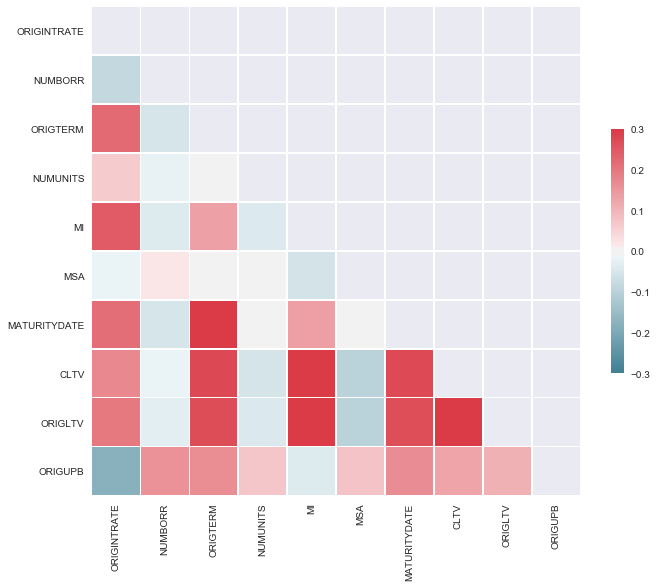

In [133]:
df_coll = df_orig[['ORIGINTRATE','NUMBORR','ORIGTERM','NUMUNITS','MI','MSA','MATURITYDATE','CLTV','ORIGLTV','ORIGUPB']]
# Compute the correlation matrix
corr = df_coll.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [69]:
df_creditscorenotnull=df_orig[df_orig.CREDITSCORE!='   ']
df_creditscorenotnull.CREDITSCORE=df_creditscorenotnull.CREDITSCORE.astype('float')
df_creditscorenotnull.ORIGINTRATE.corr(df_creditscorenotnull.CREDITSCORE)

C:\Users\visha\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


-0.17146858352897462

In [138]:
df_orig_purpose_group=df_orig.groupby('PURPOSE')
df_count=df_orig_purpose_group.count()
df_avg=df_orig_purpose_group.mean()

In [140]:
df_count

,CREDITSCORE,FIRSTPYMNTDATE,FIRSTTIMEHMBUYFLG,MATURITYDATE,MSA,MI,NUMUNITS,OCCUSTAT,CLTV,DTI,ORIGUPB,ORIGLTV,ORIGINTRATE,CHANNEL,PPM,PRODTYPE,PROPSTATE,PROPTYPE,PROPZIP,LOANSEQNUM,ORIGTERM,NUMBORR,SELLERNAME,SERVICERNAME,SUPCONFORMFLG
PURPOSE,,,,,,,,,,,,,,,,,,,,,,,,,
C,18547,18547,16449,18547,15233,18547,18547,18547,18545,18529,18547,18545,18547,18547,18507,18547,18547,18547,18547,18547,18547,18547,18547,18547,0
N,9404,9404,8343,9404,7668,9404,9404,9404,9404,9394,9404,9404,9404,9404,9384,9404,9404,9404,9404,9404,9404,9394,9404,9404,0
P,22049,22049,21711,22049,18428,22049,22049,22049,22049,22020,22049,22049,22049,22049,21996,22049,22049,22049,22049,22049,22049,22036,22049,22049,0


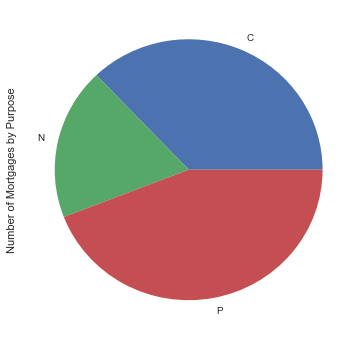

In [159]:
#pd.DataFrame([df_count.index,df_count.LOANSEQNUM]).plot(kind='pie',)
series = pd.Series(df_count.LOANSEQNUM, index=[df_count.index], name='Number of Mortgages by Purpose',)
series.plot.pie(figsize=(6, 6),subplots=True,y=df_count.LOANSEQNUM)
plt.show()

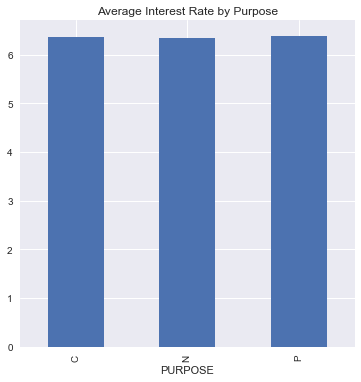

In [176]:
series = pd.Series(df_avg.ORIGINTRATE, index=[df_count.index], name='Average Interest Rate by Purpose',)
series.plot.bar(figsize=(6, 6),subplots=True,y=df_count.LOANSEQNUM)
plt.show()

In [150]:
df_orig_purpose_group.ORIGINTRATE.describe()

PURPOSE       
C        count    18547.000000
         mean         6.373048
         std          0.425559
         min          4.000000
         25%          6.125000
         50%          6.375000
         75%          6.625000
         max          8.875000
N        count     9404.000000
         mean         6.355504
         std          0.430031
         min          4.375000
         25%          6.000000
         50%          6.375000
         75%          6.625000
         max          8.875000
P        count    22049.000000
         mean         6.389383
         std          0.437502
         min          3.375000
         25%          6.125000
         50%          6.375000
         75%          6.625000
         max          9.125000
Name: ORIGINTRATE, dtype: float64

In [63]:
df_credscoreorigint=df_creditscorenotnull[['CREDITSCORE','ORIGINTRATE']]

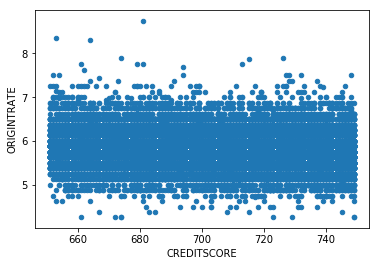

In [88]:
df_credscoreorigint=df_credscoreorigint[(df_credscoreorigint.CREDITSCORE>650)&(df_credscoreorigint.CREDITSCORE<750)]
df_credscoreorigint.plot.scatter('CREDITSCORE','ORIGINTRATE')
plt.show()

In [ ]:
df_origloantermint=df_creditscorenotnull[['ORIGTERM','ORIGINTRATE']]


In [89]:
df_dtiscorenotnull=df_creditscorenotnull[['DTI','CREDITSCORE']]

In [80]:
df_creditscorenotnull.replace(to_replace='   ',value=65,inplace=True)
df_creditscorenotnull.fillna(0,inplace=True)
df_creditscorenotnull

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\visha\Anaconda3\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,CREDITSCORE,FIRSTPYMNTDATE,FIRSTTIMEHMBUYFLG,MATURITYDATE,MSA,MI,NUMUNITS,OCCUSTAT,CLTV,DTI,ORIGUPB,ORIGLTV,ORIGINTRATE,CHANNEL,PPM,PRODTYPE,PROPSTATE,PROPTYPE,PROPZIP,LOANSEQNUM,PURPOSE,ORIGTERM,NUMBORR,SELLERNAME,SERVICERNAME,SUPCONFORMFLG
0,722.0,200504,N,203503,0.0,000,1,O,80.0,48,62000,80.0,5.750,R,N,FRM,WA,MH,98200.0,F105Q1000064,P,360,2.0,Other sellers,Other servicers,0.0
1,759.0,200503,N,203502,0.0,000,1,O,25.0,25,198000,25.0,5.250,R,N,FRM,MD,SF,20600.0,F105Q1000076,N,360,2.0,Other sellers,"PNCMTGESERVICES,INC",0.0
2,591.0,200504,N,203503,39100.0,000,1,O,48.0,34,100000,48.0,5.750,R,N,FRM,NY,SF,12500.0,F105Q1000087,C,360,2.0,Other sellers,Other servicers,0.0
3,792.0,200503,N,203502,39100.0,000,1,O,90.0,33,334000,80.0,5.875,R,N,FRM,NY,SF,12500.0,F105Q1000130,P,360,2.0,Other sellers,Other servicers,0.0
4,725.0,200503,N,203502,48864.0,000,1,O,49.0,41,125000,49.0,5.875,R,N,FRM,DE,SF,19700.0,F105Q1000195,N,360,2.0,Other sellers,USBANKNA,0.0
5,788.0,200503,N,203502,0.0,000,1,O,75.0,55,145000,75.0,5.750,R,N,FRM,TX,SF,78100.0,F105Q1000217,N,360,2.0,Other sellers,"WELLSFARGOBANK,NA",0.0
6,691.0,200503,N,203502,0.0,35,1,O,97.0,48,73000,97.0,6.000,R,N,FRM,OH,SF,44600.0,F105Q1000227,P,360,2.0,Other sellers,Other servicers,0.0
7,687.0,200503,N,203502,0.0,000,1,O,40.0,46,61000,40.0,6.250,R,N,FRM,FL,SF,34400.0,F105Q1000261,P,360,2.0,Other sellers,"WELLSFARGOBANK,NA",0.0
8,784.0,200503,N,203502,0.0,000,1,O,35.0,30,80000,35.0,5.875,R,N,FRM,NH,SF,3200.0,F105Q1000282,C,360,2.0,Other sellers,Other servicers,0.0
9,703.0,200503,N,203502,0.0,000,1,O,67.0,53,100000,67.0,5.875,R,N,FRM,OR,MH,97800.0,F105Q1000305,P,360,2.0,Other sellers,Other servicers,0.0


In [84]:
df_creditscorenotnull.DTI=df_creditscorenotnull.DTI.astype('float')

C:\Users\visha\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


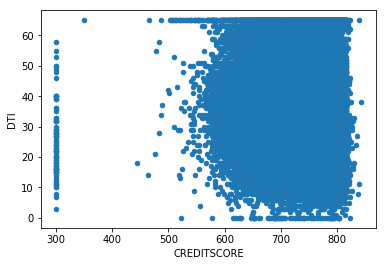

In [90]:
df_creditscorenotnull.plot.scatter('CREDITSCORE','DTI')
plt.show()

In [28]:
df_orig.dtypes

CREDITSCORE           object
FIRSTPYMNTDATE         int64
FIRSTTIMEHMBUYFLG     object
MATURITYDATE           int64
MSA                  float64
MI                    object
NUMUNITS               int64
OCCUSTAT              object
CLTV                 float64
DTI                   object
ORIGUPB                int64
ORIGLTV              float64
ORIGINTRATE          float64
CHANNEL               object
PPM                   object
PRODTYPE              object
PROPSTATE             object
PROPTYPE              object
PROPZIP              float64
LOANSEQNUM            object
PURPOSE               object
ORIGTERM               int64
NUMBORR              float64
SELLERNAME            object
SERVICERNAME          object
SUPCONFORMFLG        float64
dtype: object

In [91]:
df_orig['ORIGINTRATE'].corr(df_orig['CREDITSCORE'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [37]:
df_orig.FIRSTPYMNTDATE.unique()


array([201503, 201504, 201505, 201502, 201506, 201509, 201511, 201510,
       201507, 201601, 201512, 201508, 201602, 201604, 201603, 201606,
       201605, 201610, 201609, 201608, 201607, 201611], dtype=int64)

# Performance Data Cleaning

In [33]:
summcollist=['LOAN_SEQ_NO','MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','CUR_LOAN_DELQ_STAT','LOAN_AGE','MONTHS_LEG_MATURITY','REPURCHASE_FLAG','MOD_FLAG','ZERO_BAL_CODE','ZERO_BAL_EFF_DATE','CURR_IR','CURR_DEF_UPB','DDLPI','MI_RECOVERIES','NET_SALES_PROCEDS','NON_MI_RECOV','EXPENSES','LEGAL_COSTS','MNTC_PRES_COST','TAX_INSUR','MIS_EXPENSES','ACT_LOSS_CALC','MOD_COST']
df_summary=pd.read_csv(MAINPATH+FILENAMESUMMARY,names=summcollist,delimiter='|')
df_summary.head()

C:\Users\visha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LOAN_SEQ_NO,MONTHLY_REPORT_PERIOD,CUR_ACT_UPB,CUR_LOAN_DELQ_STAT,LOAN_AGE,MONTHS_LEG_MATURITY,REPURCHASE_FLAG,MOD_FLAG,ZERO_BAL_CODE,ZERO_BAL_EFF_DATE,CURR_IR,CURR_DEF_UPB,DDLPI,MI_RECOVERIES,NET_SALES_PROCEDS,NON_MI_RECOV,EXPENSES,LEGAL_COSTS,MNTC_PRES_COST,TAX_INSUR,MIS_EXPENSES,ACT_LOSS_CALC,MOD_COST
0,F107Q1000009,200702,110000.0,0,0,360,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F107Q1000009,200703,110000.0,0,1,359,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F107Q1000009,200704,110000.0,0,2,358,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F107Q1000009,200705,110000.0,0,3,357,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F107Q1000009,200706,110000.0,0,4,356,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df_summary.MONTHLYREPORTPERIOD.unique()

array([200710, 200711, 200712, 200801, 200802, 200803, 200804, 200805,
       200806, 200807, 200808, 200809, 200810, 200709, 200811, 200812,
       200901, 200902, 200903, 200904, 200905, 200906, 200907, 200908,
       200909, 200910, 200911, 200912, 201001, 201002, 201003, 201004,
       201005, 201006, 201007, 201008, 201009, 201010, 200708, 201011,
       201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
       201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203,
       201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211,
       201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307,
       201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403,
       201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411,
       201412, 201501, 201502, 201503, 201504, 201505, 201506, 201507,
       201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603,
       201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611,
      

In [201]:
rowcnt = len(df_summary.index)
# Example data
features = []
missngpercnt = []
#error = np.random.rand(len(features))
if rowcnt > 0:
    for x in df_summary:
        features.append(x)
        prcnt = float(len(df_summary[df_summary[x].isnull()])) / float(rowcnt) * 100.0
        missngpercnt.append(prcnt)
else:
    features = df.columns
    missngpercnt = [0] * len(features)


In [202]:
missingprcntdata = pd.DataFrame({'Features':features,'MissingPercentage':missngpercnt})
missingprcntdata = missingprcntdata.sort_values('MissingPercentage',ascending =False)
missingprcntdata

,Features,MissingPercentage
7,MODIFYFG,99.858153
15,NONMIREVOVERIES,99.825609
21,ACTLOSSCALC,99.825609
20,MISCEXPENSES,99.825609
19,TAXANDINSU,99.825609
18,MAINTPRESERVCOST,99.825609
17,LEGALCOST,99.825609
16,EXPENSES,99.825609
13,MIRECOVERIES,99.825609
14,NETSALESPROCEEDS,99.825609


In [195]:
df_summary.dtypes

LOANSEQNUM              object
MONTHLYREPORTPERIOD      int64
CURRACTUPB             float64
CURRDELSTAT             object
AGE                      int64
REMMONTHSTOMAT           int64
REPURFLG                object
MODIFYFG                object
ZEROBALCODE            float64
ZEROBALEFFDATE         float64
CURRINTRATE            float64
CURRDEFUPB             float64
DDLPI                  float64
MIRECOVERIES           float64
NETSALESPROCEEDS        object
NONMIREVOVERIES        float64
EXPENSES               float64
LEGALCOST              float64
MAINTPRESERVCOST       float64
TAXANDINSU             float64
MISCEXPENSES           float64
ACTLOSSCALC            float64
MODIFICATIONCOST       float64
dtype: object

In [197]:
df_summary.REPURFLG.unique()

array([nan, 'N', 'Y'], dtype=object)

# Correlation

In [183]:
df_summary.CURRDELSTAT.value_counts()

0      13267812
1        486245
2        178755
3         92343
4         71046
5         60384
6         52021
7         45809
8         40182
9         35939
10        32183
R         30300
11        28393
12        25497
13        22887
14        20557
15        18614
16        16593
17        15043
18        13665
19        12473
20        11358
21        10424
22         9517
23         8769
24         8122
25         7449
26         6894
27         6491
28         6051
         ...   
78          222
79          208
80          193
81          176
82          168
83          149
84          134
85          117
86          113
87           96
88           95
89           77
90           67
91           56
92           47
93           40
94           35
95           31
96           27
97           24
98           17
99           16
100          12
101           8
102           6
103           4
104           4
105           2
167           1
129           1
Name: CURRDELSTAT, dtype

In [112]:
df_summary.CURRDELSTAT.replace(to_replace='   ',value=-1,inplace=True)
df_summary.CURRDELSTAT.replace(to_replace='R',value=-1,inplace=True)
df_summary.CURRDELSTAT.replace(to_replace='XX',value=-1,inplace=True)

df_summary.CURRDELSTAT=df_summary.CURRDELSTAT.astype('float')

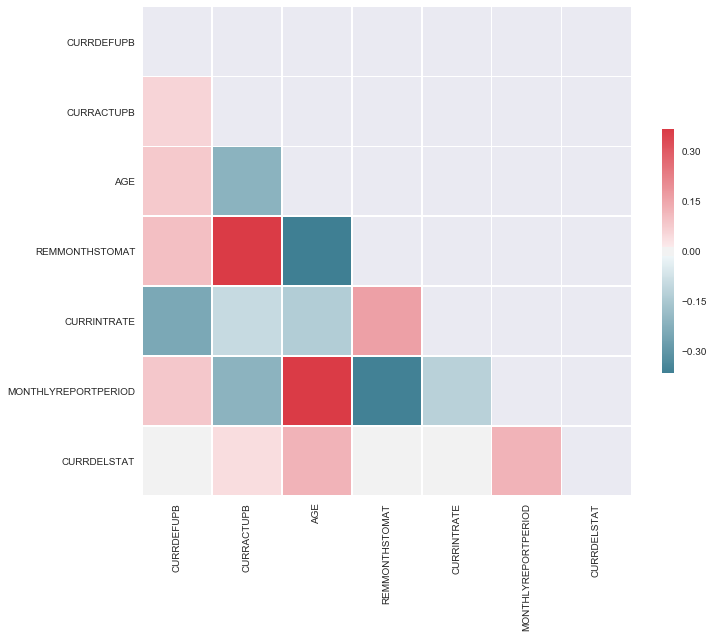

In [160]:
df_coll = df_summary[['CURRDEFUPB','CURRACTUPB','AGE','REMMONTHSTOMAT','CURRINTRATE','MONTHLYREPORTPERIOD','CURRDELSTAT']]
# Compute the correlation matrix
corr = df_coll.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Distribution of CURRACTUPB

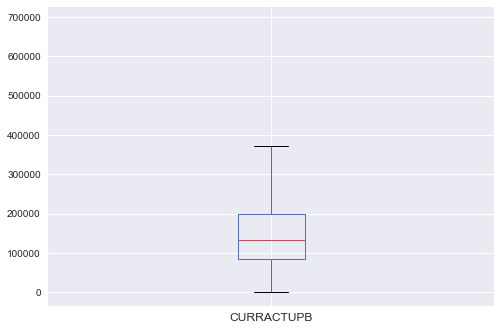

In [168]:
df_coll[['CURRACTUPB']].boxplot()
plt.show()

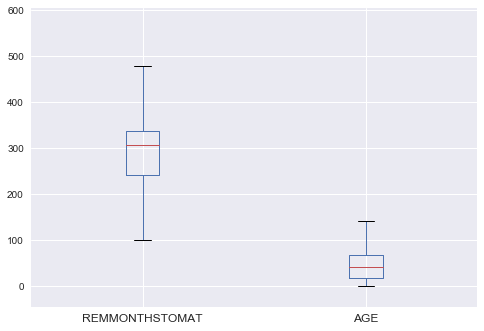

In [169]:
df_coll[['REMMONTHSTOMAT','AGE']].boxplot()
plt.show()

In [165]:
df_coll.describe()

,CURRDEFUPB,CURRACTUPB,AGE,REMMONTHSTOMAT,CURRINTRATE,MONTHLYREPORTPERIOD,CURRDELSTAT
count,3.574034e+06,3.574034e+06,3.574034e+06,3.574034e+06,3.574034e+06,3.574034e+06,3.574034e+06
mean,2.049973e+02,1.487032e+05,4.698341e+01,2.780222e+02,5.736585e+00,2.009060e+05,3.252370e-01
std,4.076211e+03,8.444435e+04,3.414612e+01,8.293207e+01,5.444475e-01,2.853446e+02,2.777516e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.500000e+01,0.000000e+00,2.005020e+05,-1.000000e+00
25%,0.000000e+00,8.500000e+04,1.900000e+01,2.420000e+02,5.500000e+00,2.007020e+05,0.000000e+00
50%,0.000000e+00,1.338152e+05,4.100000e+01,3.070000e+02,5.750000e+00,2.008120e+05,0.000000e+00
75%,0.000000e+00,1.995843e+05,6.900000e+01,3.370000e+02,6.000000e+00,2.011050e+05,0.000000e+00
max,2.340000e+05,6.910000e+05,1.420000e+02,5.760000e+02,9.990000e+00,2.016120e+05,1.220000e+02


In [196]:
df_summary.MONTHLYREPORTPERIOD.unique()

array([200710, 200711, 200712, 200801, 200802, 200803, 200804, 200805,
       200806, 200807, 200808, 200809, 200810, 200709, 200811, 200812,
       200901, 200902, 200903, 200904, 200905, 200906, 200907, 200908,
       200909, 200910, 200911, 200912, 201001, 201002, 201003, 201004,
       201005, 201006, 201007, 201008, 201009, 201010, 200708, 201011,
       201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
       201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203,
       201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211,
       201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307,
       201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403,
       201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411,
       201412, 201501, 201502, 201503, 201504, 201505, 201506, 201507,
       201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603,
       201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611,
      

# Cleaning Code - Performance File

In [ ]:
df_summary

# Summarization Code

In [19]:
df_summary.head()

,LOAN_SEQ_NO,MONTHLY_REPORT_PERIOD,CUR_ACT_UPB,CUR_LOAN_DELQ_STAT,LOAN_AGE,MONTHS_LEG_MATURITY,REPURCHASE_FLAG,MOD_FLAG,ZERO_BAL_CODE,ZERO_BAL_EFF_DATE,CURR_IR,CURR_DEF_UPB,DDLPI,MI_RECOVERIES,NET_SALES_PROCEDS,NON_MI_RECOV,EXPENSES,LEGAL_COSTS,MNTC_PRES_COST,TAX_INSUR,MIS_EXPENSES,ACT_LOSS_CALC,MOD_COST
0,F107Q1000009,200702,110000.0,0,0,360,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F107Q1000009,200703,110000.0,0,1,359,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F107Q1000009,200704,110000.0,0,2,358,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F107Q1000009,200705,110000.0,0,3,357,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F107Q1000009,200706,110000.0,0,4,356,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
def get_current_upb(group):
    return {'min_current_upb': group.min(), 'max_current_upb': group.max()}
def get_delq_sts(group):
    return {'min_delq_sts': group.min(), 'max_delq_sts': group.max()}
(df_summary['CUR_ACT_UPB'].groupby(df_summary['LOAN_SEQ_NO']).apply(get_current_upb).unstack())
summ_df = pd.DataFrame()
summ_df['LOAN_SEQ_NO']= df_summary['LOAN_SEQ_NO'].drop_duplicates()
summ_df=summ_df.join((df_summary['CUR_ACT_UPB'].groupby(df_summary['LOAN_SEQ_NO']).apply(get_current_upb).unstack()),on='LOAN_SEQ_NO')
summ_df=summ_df.join((df_summary['CUR_LOAN_DELQ_STAT'].groupby(df_summary['LOAN_SEQ_NO']).apply(get_delq_sts).unstack()),on='LOAN_SEQ_NO')

In [34]:
df_summary

,LOAN_SEQ_NO,MONTHLY_REPORT_PERIOD,CUR_ACT_UPB,CUR_LOAN_DELQ_STAT,LOAN_AGE,MONTHS_LEG_MATURITY,REPURCHASE_FLAG,MOD_FLAG,ZERO_BAL_CODE,ZERO_BAL_EFF_DATE,CURR_IR,CURR_DEF_UPB,DDLPI,MI_RECOVERIES,NET_SALES_PROCEDS,NON_MI_RECOV,EXPENSES,LEGAL_COSTS,MNTC_PRES_COST,TAX_INSUR,MIS_EXPENSES,ACT_LOSS_CALC,MOD_COST
0,F107Q1000009,200702,110000.00,0,0,360,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F107Q1000009,200703,110000.00,0,1,359,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F107Q1000009,200704,110000.00,0,2,358,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F107Q1000009,200705,110000.00,0,3,357,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F107Q1000009,200706,110000.00,0,4,356,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F107Q1000009,200707,109000.00,0,5,355,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,F107Q1000009,200708,109000.00,0,6,354,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,F107Q1000009,200709,109203.14,0,7,353,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,F107Q1000009,200710,109096.63,0,8,352,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,F107Q1000009,200711,108989.56,0,9,351,NaN,NaN,NaN,NaN,6.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
summ_df['JAJA']=summ_df['LOAN_SEQ_NO']
summ_df

,LOAN_SEQ_NO,max_current_upb,min_current_upb,max_delq_sts,min_delq_sts,JAJA
0,F107Q1000009,110000.00,0.00,2,0,F107Q1000009
103,F107Q1000019,170000.00,0.00,0,0,F107Q1000019
150,F107Q1000028,81000.00,63099.48,0,0,F107Q1000028
268,F107Q1000046,280000.00,0.00,0,0,F107Q1000046
298,F107Q1000065,150000.00,0.00,0,0,F107Q1000065
328,F107Q1000074,75000.00,0.00,2,0,F107Q1000074
343,F107Q1000083,153000.00,0.00,0,0,F107Q1000083
422,F107Q1000093,200000.00,0.00,0,0,F107Q1000093
449,F107Q1000120,204000.00,0.00,0,0,F107Q1000120
509,F107Q1000130,98000.00,82357.40,5,0,F107Q1000130


In [35]:
df_orig

,CREDIT_SCORE,FIRST_PAY_DATE,FIRST_HOME_BUYER_FLAG,MATURITY_DATE,MSA,MI_PERCENT,N_UNITS,OCCUPANCY_STATS,OG_CLTV,OG_DTI,OG_UPB,OG_LTV,OG_IR,CHANNEL,PPM_FLAG,PRODUCT_TYPE,PROP_STATE,PROP_TYPE,POSTALCODE,LOAN_SEQ_NO,LOAN_PURPOSE,OG_LOANTERM,NO_BORROWERS,SELLER_NAME,SERVICE_NAME,SUPER_CONFORMING_FLAG
0,606,200703,N,203702,NaN,0,1,O,62.0,46,110000,62.0,6.375,R,N,FRM,AK,SF,99600,F107Q1000009,C,360,2.0,Other sellers,Other servicers,NaN
1,712,200703,N,203702,NaN,0,1,O,48.0,15,170000,48.0,6.000,R,N,FRM,ME,SF,4500,F107Q1000019,C,360,2.0,Other sellers,Other servicers,NaN
2,698,200704,N,203703,24020.0,0,1,I,75.0,50,81000,75.0,6.625,R,N,FRM,NY,SF,12800,F107Q1000028,C,360,2.0,Other sellers,Other servicers,NaN
3,757,200703,N,203702,NaN,0,1,O,83.0,48,280000,80.0,5.875,R,N,FRM,KY,SF,42100,F107Q1000046,N,360,1.0,Other sellers,Other servicers,NaN
4,761,200703,N,203702,24660.0,0,1,O,43.0,32,150000,43.0,6.000,R,N,FRM,NC,SF,27200,F107Q1000065,C,360,1.0,Other sellers,USBANKNA,NaN
5,645,200703,N,203702,17140.0,0,1,O,60.0,37,75000,60.0,6.500,R,N,FRM,OH,SF,45000,F107Q1000074,P,360,1.0,Other sellers,Other servicers,NaN
6,714,200703,N,203702,12980.0,0,1,O,80.0,51,153000,80.0,6.250,R,N,FRM,MI,SF,49000,F107Q1000083,N,360,1.0,Other sellers,Other servicers,NaN
7,692,200703,N,203702,14020.0,0,1,O,74.0,30,200000,74.0,6.000,R,N,FRM,IN,SF,47400,F107Q1000093,N,360,2.0,Other sellers,Other servicers,NaN
8,762,200703,N,203702,25540.0,25,2,O,90.0,56,204000,90.0,6.000,R,N,FRM,CT,SF,6400,F107Q1000120,P,360,1.0,Other sellers,Other servicers,NaN
9,590,200703,N,203702,NaN,0,1,O,39.0,21,98000,39.0,6.125,R,N,FRM,IL,SF,61300,F107Q1000130,C,360,2.0,Other sellers,USBANKNA,NaN
